# Trabajo Práctico 3

Introducción a los sistemas críticos

Gonzalo Nahuel Vaca

In [79]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

Este ejercicio se encuentra resuelto a modo de ejemplo en la guía del trabajo práctico.

### Asignación de valores

In [80]:
## Asignación de valores
lambda1 = np.array([[0.0002], [0.0004], [0.0001]]) # Failure rate 1
lambda2 = np.array([[0.0008], [0.0006], [0.0001]])# Failure rate 2
x_year = 24*365 # cantidad de horas al año
x_years = 30*x_year # cantidad de horas al año

### Cálculo de Confiabilidad

In [81]:
N = 1000
x = np.linspace(0, x_years, N)
# Calculo de confiabilidad e inconfiabilidad
Rs = np.exp(-lambda1*x)+np.exp(-lambda2*x)-np.exp(-(lambda1+lambda2)*x) # Confiabilidad

Fs = 1 - Rs

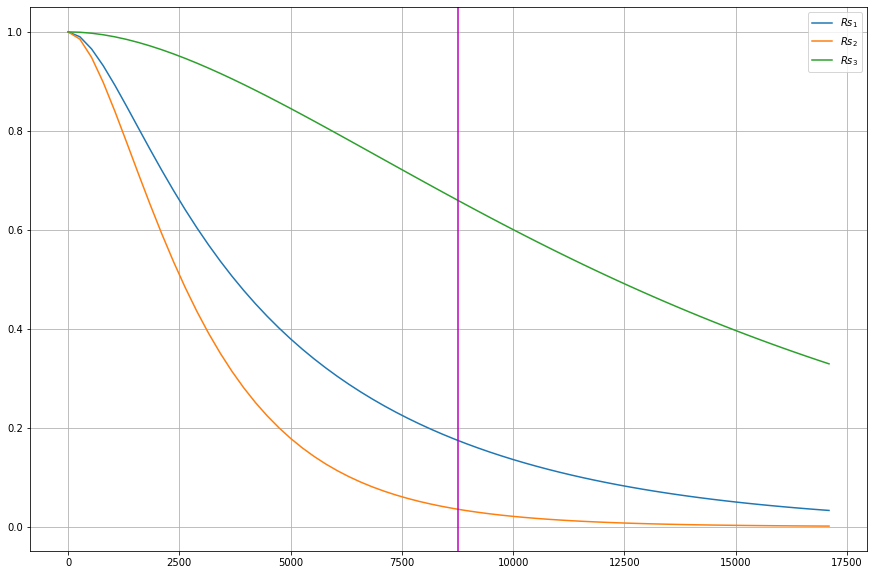

In [82]:
index_2years = int(x_year/(x_years/N))*2
plt.figure(figsize=(15, 10))
plt.plot(x[:index_2years], Rs[0][:index_2years], label="$Rs_1$")
plt.plot(x[:index_2years], Rs[1][:index_2years], label="$Rs_2$")
plt.plot(x[:index_2years], Rs[2][:index_2years], label="$Rs_3$")
plt.axvline(x=x_year, color = 'm')
plt.legend()
plt.grid()
plt.show()

### Cálculo MTTF

In [83]:
# Calculo MTTF
MTTF_years = np.trapz(Rs, x=x)
print(f"MTTF calculado en python = {MTTF_years}")
MTTF_teorico = 1/lambda1 + 1/lambda2 - 1/(lambda1+lambda2)
print(f"MTTF calculado teoricamente = {MTTF_teorico.T}")

MTTF calculado en python = [ 5250.00318528  3166.67144563 15000.00003983]
MTTF calculado teoricamente = [[ 5250.          3166.66666667 15000.        ]]


In [84]:
# Calculo la tasa de falla del sistema
numerador_Zs = lambda1*np.exp(-lambda1*x)+lambda2*np.exp(-lambda2*x)-\
(lambda1+lambda2)*np.exp(-(lambda1+lambda2)*x)
Zs = numerador_Zs / Rs

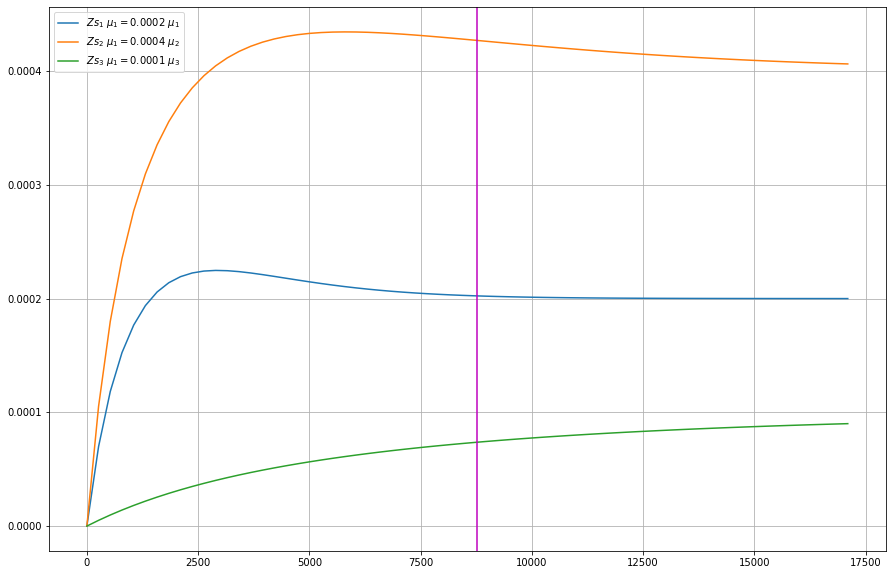

In [85]:
plt.figure(figsize=(15, 10))
plt.plot(x[:index_2years], Zs[0][:index_2years], label="$Zs_1$ $\mu_1=0.0002$ $\mu_1$")
plt.plot(x[:index_2years], Zs[1][:index_2years], label="$Zs_2$ $\mu_1=0.0004$ $\mu_2$")
plt.plot(x[:index_2years], Zs[2][:index_2years], label="$Zs_3$ $\mu_1=0.0001$ $\mu_3$")
plt.axvline(x=x_year, color = 'm')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 2

Desarrollar y calcular la confiabilidad de un sistema de dos componentes en
**serie** para una vida útil de $T_1$ y $T_2$ que se supone que son independientes y distribuidas
exponencialmente con tasas de falla $\lambda_1$ y $\lambda_2$.

### Asignación de valores

In [86]:
lambda1_2 = np.array([[1e-8], [2e-8]])  # Failure rate 1
lambda2_2 = np.array([[12e-9], [2e-8]])  # Failure rate 2

### Cálculo de confiabilidad

El sistema es en serie, por lo tanto es la productoria de la confiabilidad (R) de los componentes.

In [87]:
Rs_2 = np.exp(-lambda1_2*x) * np.exp(-lambda2_2*x) # Confiabilidad

Fs_2 = 1 - Rs_2

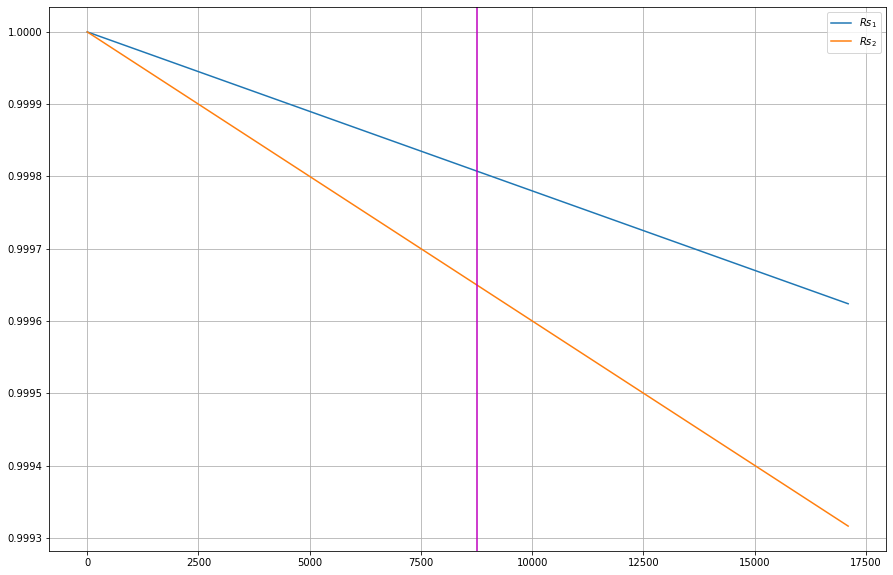

In [88]:
index_2years = int(x_year/(x_years/N))*2
plt.figure(figsize=(15, 10))
plt.plot(x[:index_2years], Rs_2[0][:index_2years], label="$Rs_1$")
plt.plot(x[:index_2years], Rs_2[1][:index_2years], label="$Rs_2$")
plt.axvline(x=x_year, color = 'm')
plt.legend()
plt.grid()
plt.show()

### Cálculo MTTF

In [89]:
# Calculo MTTF
MTTF_years_2 = np.trapz(Rs_2, x=x)
print(f"MTTF calculado en python = {MTTF_years}")
# MTTF_teorico_2 = 1/lambda1_2 + 1/lambda2_2 - 1/(lambda1_2+lambda2_2) <- Está mal.
MTTF_teorico_2 = 1 / (lambda1_2 + lambda2_2) # Fórmula correcta, serie (lambda equivalente es la suma de los componentes)
print(f"MTTF calculado teoricamente = {MTTF_teorico.T}")

MTTF calculado en python = [ 5250.00318528  3166.67144563 15000.00003983]
MTTF calculado teoricamente = [[ 5250.          3166.66666667 15000.        ]]


In [90]:
# Calculo la tasa de falla del sistema

# Está mal.
#numerador_Zs_2 = lambda1_2*np.exp(-lambda1_2*x)+lambda2_2*np.exp(-lambda2_2*x)-\
#(lambda1_2+lambda2_2)*np.exp(-(lambda1_2+lambda2_2)*x)
#Zs_2 = numerador_Zs_2 / Rs_2

Nota de la corrección: la tasa de falla del sistema es la suma de las tasas de los componentes. Esto se debe a que es un sistema en serie, esto significa que $ \lambda_{serie} = \lambda_1 + \lambda_2 $

In [91]:
Zs_2 = lambda1_2+lambda2_2
print(f"La tasa de falla del sistema serie es {Zs_2[0]} y {Zs_2[1]}")

La tasa de falla del sistema serie es [2.2e-08] y [4.e-08]


El gráfico que solía estar en la versión anterior ya no tiene sentido y la celda de código queda rota.

Se mantiene el código comentado para evitar la confusión a la hora que el docente deba comparar los cambios.

In [92]:
# plt.figure(figsize=(15, 10))
# plt.plot(x[:index_2years], Zs_2[0][:index_2years], label="$Zs_1$ $\mu_1=0.0002$ $\mu_1$")
# plt.plot(x[:index_2years], Zs_2[1][:index_2years], label="$Zs_2$ $\mu_1=0.0004$ $\mu_2$")
# plt.axvline(x=x_year, color = 'm')
# plt.legend()
# plt.grid()
# plt.show()

## Ejercicio 3

Desarrollar y calcular la confiabilidad de un sistema de tres componentes en **2oo3** para una vida útil de $T_1$ , $T_2$ y $T_3$ que se supone que son independientes y distribuidas exponencialmente con tasas de falla.

$$ \lambda_1 = [10.10^{-9}, 100.10^{-9}, 2.10^{-8}] $$
$$ \lambda_2 = [12.10^{-9}, 120.10^{-9}, 2.10^{-8}] $$
$$ \lambda_3 = [15.10^{-9}, 150.10^{-9}, 2.10^{-8}] $$

### Confiabilidad del sistema **2oo3**

$$ R_s(t) = R_1(t).R_2(t) + R_1(t).R_3(t) + R_2(t).R_3(t) - 2.R_1(t).R_2(t).R_3(t) $$

$$ R_i(t) = e^{-\lambda.t} $$

In [93]:
l1 = [10e-9, 100e-9, 2e-8]
l2 = [12e-9, 120e-9, 2e-8]
l3 = [15e-9, 150e-9, 2e-8]

In [94]:
def compute_rs_2oo3(R1, R2, R3):
    return (R1 * R2) + (R1 * R3) + (R2 * R3) - (2 * R1 * R2 * R3)


Rs = []

for index in range(0, len(l1)):
    R1 = np.exp(-l1[index]*x)
    R2 = np.exp(-l2[index]*x)
    R3 = np.exp(-l3[index]*x)

    Rs.append(compute_rs_2oo3(R1, R2, R3))


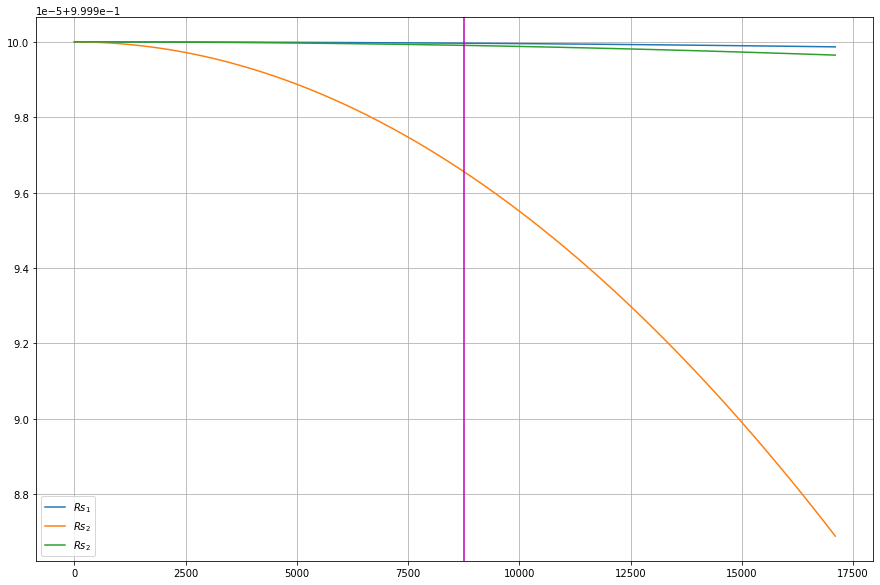

In [95]:
index_2years = int(x_year/(x_years/N))*2
plt.figure(figsize=(15, 10))
plt.plot(x[:index_2years], Rs[0][:index_2years], label="$Rs_1$")
plt.plot(x[:index_2years], Rs[1][:index_2years], label="$Rs_2$")
plt.plot(x[:index_2years], Rs[2][:index_2years], label="$Rs_2$")
plt.axvline(x=x_year, color = 'm')
plt.legend()
plt.grid()
plt.show()

### Cálculo MTTF

$$ MTTF_{teórico} =  \int_{t=0}^{\infty} R_s(t) \,dx  $$

$$ MTTF_{computacional} =  \sum_{t=0}^{T} R_s(t) \Delta t $$

In [96]:
def MTTF_2oo3(Rs, delta_time):
    mttf = []
    accumulator = 0
    for element in Rs:
        accumulator = accumulator + (element * delta_time)
        mttf.append(accumulator)
    return mttf

MTTF = []

for index in range(0, len(Rs)):
    MTTF.append(MTTF_2oo3(Rs[index], delta_time=x[1]))

print("MTTF 1:",MTTF[0][-1])
print("MTTF 2:",MTTF[1][-1])
print("MTTF 3:",MTTF[2][-1])


MTTF 1: 263060.34747261764
MTTF 2: 262801.16041456995
MTTF 3: 263055.8397709187


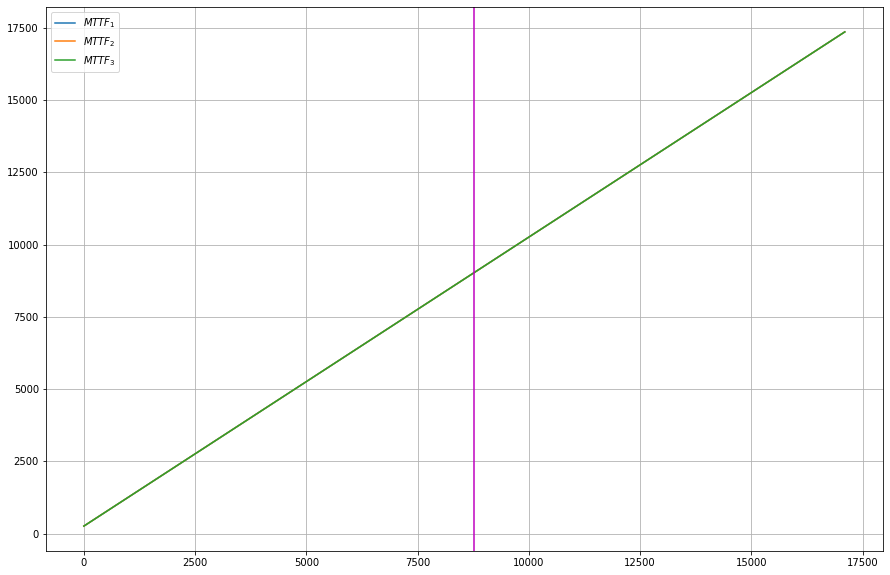

In [97]:
plt.figure(figsize=(15, 10))
plt.plot(x[:index_2years], MTTF[0][:index_2years], label="$MTTF_1$")
plt.plot(x[:index_2years], MTTF[1][:index_2years], label="$MTTF_2$")
plt.plot(x[:index_2years], MTTF[2][:index_2years], label="$MTTF_3$")
plt.axvline(x=x_year, color = 'm')
plt.legend()
plt.grid()
plt.show()